<a href="https://colab.research.google.com/github/komalimaddipati123/komali/blob/master/LG_and_LGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LG without dataset**

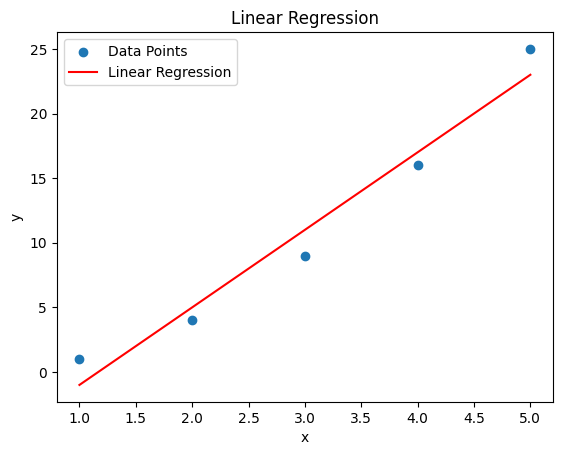

m= 6.0
c= -7.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array([1,2,3,4,5])
y=np.array([1,4,9,16,25])
N=len(x)
sum_x=np.sum(x)
sum_y=np.sum(y)
sum_xy=np.sum(x*y)S
sum_x2=np.sum(x**2)
m=(N*sum_xy-sum_x*sum_y)/(N*sum_x2-sum_x**2)
c=(sum_y-m*sum_x)/N
y_pred=m*x+c
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend(['Data Points','Linear Regression'])
plt.show()
print('m=',m)
print('c=',c)

**LG with dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the dataset
data = {
    'Square_Feet': [1500, 1800, 1200, 2000,1700,2500,2200],
    'Bedrooms': [3, 4, 2, 4, 3, 5, 4],
    'Bathrooms': [2, 3, 1, 3, 2, 4, 3],
    'Location_Score': [8.5, 9.0, 7.2, 9.5, 8.0, 9.8, 9.2],
    'Price': [250000, 320000, 180000, 350000,290000,500000,400000]
}

df = pd.DataFrame(data)

# Split data into features and target variable
X= df[['Square_Feet', 'Bedrooms', 'Bathrooms', 'Location_Score']]
y= df['Price']

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Predict price for a new house
new_house = np.array([[1600, 3, 2, 8.0]])  # Example input
predicted_price = model.predict(new_house)
print(f'Predicted Price for new house: ${predicted_price[0]:,.2f}')

Mean Squared Error: 391130911.83
R² Score: 0.68
Predicted Price for new house: $281,407.19


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**LGR without dataset**

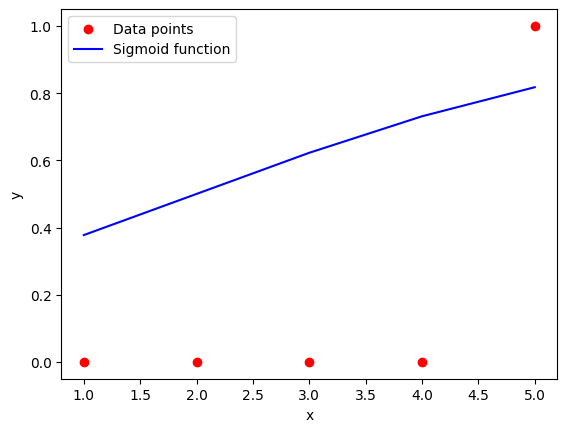

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):
  return 1/(1+np.exp(-z))
x=np.array([1,2,3,4,5])
y=np.array([0,0,0,0,1])
m,c=0.5,-1
z=m*x+c
y_pred=sigmoid(z)
y_classified=(y_pred>=0.5).astype(int)
plt.scatter(x,y,color='red',label="Data points")
plt.plot(x,y_pred,color='blue',label="Sigmoid function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**LGR with dataset**

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



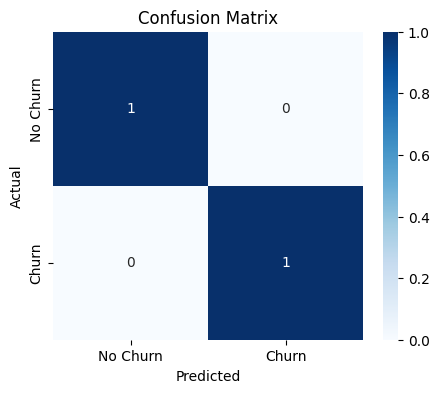

Predicted Churn for new customer: Yes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Create the dataset
data = {
    'Monthly_Charges': [40, 60, 80, 45, 30, 70, 50],
    'Contract_Type': [0, 1, 0, 1, 0, 1, 0],  # 0 = Month-to-Month, 1 = Annual
    'Tenure': [12, 24, 6, 36, 42, 48, 54],
    'Support_Requests': [2, 0, 3, 1,3,0,2],
    'Churn': [1, 0, 1, 0,1,0,1]  # 0 = No, 1 = Yes
}

df = pd.DataFrame(data)

# Split data into features and target variable
X = df[['Monthly_Charges', 'Contract_Type', 'Tenure', 'Support_Requests']]
y = df['Churn']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualizing the Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict whether a new customer will churn
new_customer = np.array([[60, 0, 18, 2]])  # Example input
new_customer_scaled = scaler.transform(new_customer)
prediction = model.predict(new_customer_scaled)

print(f'Predicted Churn for new customer: {"Yes" if prediction[0] == 1 else "No"}')